In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
health_reviews = pd.read_json('reviews_Health_and_Personal_Care_5.json', lines=True)

In [39]:
reviews = health_reviews.copy()

In [40]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,159985130X,"[1, 1]",5,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600
1,159985130X,"[1, 1]",4,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200
2,159985130X,"[75, 77]",4,What I liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200
3,159985130X,"[56, 60]",4,Love the Great point light pocket magnifier! ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800
4,159985130X,"[1, 1]",5,This is very nice. You pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800


In [41]:
reviews.shape

(346355, 9)

I'm going to first lowercase the text for reviewText and summary...

In [42]:
reviews.reviewText = reviews.reviewText.str.lower()

In [43]:
reviews.reviewText.head()

0    this is a great little gadget to have around. ...
1    i would recommend this for a travel magnifier ...
2    what i liked was the quality of the lens and t...
3    love the great point light pocket magnifier!  ...
4    this is very nice. you pull out on the magnifi...
Name: reviewText, dtype: object

In [44]:
reviews.reviewText = reviews['reviewText'].str.replace('[^\w\s]',' ')

In [45]:
reviews.reviewText.head()

0    this is a great little gadget to have around  ...
1    i would recommend this for a travel magnifier ...
2    what i liked was the quality of the lens and t...
3    love the great point light pocket magnifier   ...
4    this is very nice  you pull out on the magnifi...
Name: reviewText, dtype: object

In [46]:
keywords = ['great', 'good', 'fantastic', 'useful', 'love', 'nice', 'recommend']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [47]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,great,good,fantastic,useful,love,nice,recommend
0,159985130X,"[1, 1]",5,this is a great little gadget to have around ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,True,False,False,False,False,False,False
1,159985130X,"[1, 1]",4,i would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,True,False,False,False,False,False,True
2,159985130X,"[75, 77]",4,what i liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200,True,True,False,False,False,True,False
3,159985130X,"[56, 60]",4,love the great point light pocket magnifier ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800,True,False,False,False,False,True,False
4,159985130X,"[1, 1]",5,this is very nice you pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800,False,False,False,False,False,True,True


In [48]:
reviews.loc[reviews.overall < 4, 'overall'] = False
reviews.loc[reviews.overall >= 4, 'overall'] = True

In [49]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,great,good,fantastic,useful,love,nice,recommend
0,159985130X,"[1, 1]",True,this is a great little gadget to have around ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,True,False,False,False,False,False,False
1,159985130X,"[1, 1]",True,i would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,True,False,False,False,False,False,True
2,159985130X,"[75, 77]",True,what i liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200,True,True,False,False,False,True,False
3,159985130X,"[56, 60]",True,love the great point light pocket magnifier ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800,True,False,False,False,False,True,False
4,159985130X,"[1, 1]",True,this is very nice you pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800,False,False,False,False,False,True,True


In [64]:
reviews_subset = reviews[['overall','great','good','fantastic','useful','love','recommend','nice']]

In [65]:
reviews_subset.head()

,overall,great,good,fantastic,useful,love,recommend,nice
0,True,True,False,False,False,False,False,False
1,True,True,False,False,False,False,True,False
2,True,True,True,False,False,False,False,True
3,True,True,False,False,False,False,False,True
4,True,False,False,False,False,False,True,True


In [66]:
reviews_subset.overall = reviews_subset.overall.astype('bool')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


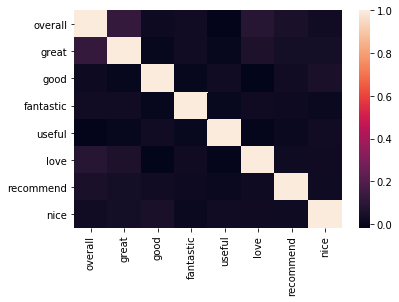

In [67]:
sns.heatmap(reviews_subset.corr())

In [68]:
data = reviews_subset[keywords]
target = reviews_subset['overall']

In [69]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 346355 points : 66554


So as of now, I'm at 80.8% correct...

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[     0,  66554],
       [     0, 279801]])

Wait a second!!!!! It kept choosing True!!!! I need to undersample like with the credit card fraud case!!!

In [72]:
positive_reviews = reviews_subset[reviews_subset.overall == True]

In [73]:
negative_reviews = reviews_subset[reviews_subset.overall == False]

In [74]:
negative_reviews.shape

(66554, 8)

In [75]:
positive_reviews.shape

(279801, 8)

In [76]:
positive_reviews_undersample = positive_reviews[:negative_reviews.shape[0]]

In [77]:
positive_reviews_undersample.shape

(66554, 8)

In [78]:
reviews_undersample = pd.concat([negative_reviews, positive_reviews_undersample])

In [79]:
reviews_undersample.shape

(133108, 8)

In [80]:
data = reviews_undersample[keywords]
target = reviews_undersample['overall']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 133108 points : 55997


42% mislabled! So, 58% correct. It's even worse this time! :-/

In [82]:
confusion_matrix(target, y_pred, labels=[False,True])

array([[53044, 13510],
       [42487, 24067]])

I'm going to try it with the entire set...

In [86]:
data_entire_set = reviews_subset[keywords]
target_entire_set = reviews_subset['overall']

In [87]:
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_entire_set)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_entire_set.shape[0],
    (target_entire_set != y_pred).sum()
))

Number of mislabeled points out of a total 346355 points : 185263


53% wrong!!!! :-/

I'm going to try it with the negative words that we discussed to see if it works a little bit better. 

In [88]:
negative_reviews = health_reviews.copy()

In [91]:
negative_reviews.reviewText = negative_reviews.reviewText.str.lower()
negative_reviews.reviewText = negative_reviews['reviewText'].str.replace('[^\w\s]',' ')

keywords = ['awful','refund','terrible','lousy','defective','bad','useless','horrible','substandard']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    negative_reviews[str(key)] = negative_reviews.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
negative_reviews.loc[negative_reviews.overall < 4, 'overall'] = False
negative_reviews.loc[negative_reviews.overall >= 4, 'overall'] = True

negative_reviews_subset = negative_reviews[keywords + ['overall']]

negative_reviews_subset.overall = negative_reviews_subset.overall.astype('bool')

negative_reviews_subset.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,awful,refund,terrible,lousy,defective,bad,useless,horrible,substandard,overall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


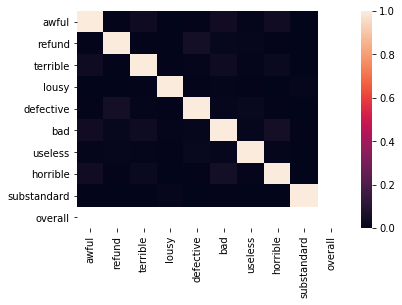

In [92]:
sns.heatmap(negative_reviews_subset.corr())

In [93]:
data = negative_reviews_subset[keywords]
target = negative_reviews_subset['overall']

# # Our data is binary / boolean, so we're importing the Bernoulli classifier.
# from sklearn.naive_bayes import BernoulliNB

# # Instantiate our model and store it in a new variable.
# bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 346355 points : 0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


Okay... so 100% correct... That's crazy!!! 

In [95]:
confusion_matrix(target, y_pred)

array([[346355]])

I think now is a good time to do some cross validations!!! :-P

In [104]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(negative_reviews_subset):
    data = negative_reviews_subset.iloc[train_index][keywords]
    target = negative_reviews_subset.iloc[train_index]['overall']
    test_data = negative_reviews_subset.iloc[test_index][keywords]
    test_target = negative_reviews_subset.iloc[test_index]['overall']

    bnb.fit(data, target)
    
    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(test_data)
    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],(test_target != y_pred).sum()))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


Number of mislabeled points out of a total 277084 points : 0
Number of mislabeled points out of a total 277084 points : 0
Number of mislabeled points out of a total 277084 points : 0
Number of mislabeled points out of a total 277084 points : 0
Number of mislabeled points out of a total 277084 points : 0


Okay... once again... 100% correct... and once again... crazy... Hey Julie, shoot me a message if you think this is totally off... Thanks! :-P